In [9]:
import numpy as np
from space_exploration.beans.dataset_bean import Dataset
from space_exploration.dataset.transforms.AllTransforms import TransformationReferences
dataset_name = "re200-sr1etot"
dataset = Dataset.get_dataset_or_fail(dataset_name)
# ds = dataset.get_training_dataset(64, TransformationReferences.DEFAULT_UNCHANGED.transformation, TransformationReferences.DEFAULT_UNCHANGED.transformation, size=1000)
ds = dataset.get_training_dataset(64, TransformationReferences.COMPONENT_NORMALIZE.transformation, TransformationReferences.Y_ALONG_COMPONENT_NORMALIZE.transformation, size=1000)
xs = np.array([x.numpy() for x, y in ds])
ys = np.array([y.numpy() for x, y in ds])

from scipy.ndimage import gaussian_filter


def center_img(image):
    image = image / (image.max() - image.min())
    image = image - image.min()
    return image

def get_img(x, component=None):
    if component is None:
        image = np.transpose(x, axes=(1, 2, 3, 0))[:, 0, :, :]
    else:
        image = x[component, :, 0, :]
    return image


from scipy.ndimage import gaussian_filter



Loading std & mean of dataset re200-sr1etot
Loading stds & means of dataset re200-sr1etot
⌛ Initializing Dataset...
X...
[########################################] | 100% Completed | 516.31 ms
Y...
[########################################] | 100% Completed | 7.02 ss


In [10]:
import numpy as np
from scipy.stats import pearsonr

def get_correlation(image_batch, field_batch, sigmas):

    batch_correlations = []
    for image, field in zip(image_batch, field_batch):
        correlations = []
        blurs =  [gaussian_filter(image, sigma=s) for s in sigmas]
        dog = [image] + [blurs[i+1] - blurs[i] for i in range(len(blurs)-1)]
        for blur_diff in dog:
            rs = []
            for velocity_slice in field:
                r, _ = pearsonr(velocity_slice.ravel(), blur_diff.ravel())
                # print(len(r))
                rs.append(r)
            correlations.append(rs)
        batch_correlations.append(correlations)
    x = np.array(batch_correlations)
    
    return np.mean(batch_correlations, axis=(0))

In [16]:
velocity_norm = .5 * np.sum(ys**2, axis=(1))
def plot_comp(comp, sigmas, comp_name="field"):
    field = xs[:, comp, ...]
    corre = get_correlation(field, velocity_norm, sigmas)
    import matplotlib.pyplot as plt
    names = ["default"] + [f"{o1}-{o2}" for o1, o2 in zip(sigmas, sigmas[1:])]
    for corr, name in zip(corre, names):
        plt.plot(dataset.channel.get_simulation_channel().y_dimension[:64] * 200, corr, label=name)
    plt.xlabel('Y')
    plt.ylabel(f'Correlation with {comp_name}')
    plt.title(f'Wall {comp_name} correlation vs. wall distance')
    plt.legend()
    plt.show()
        

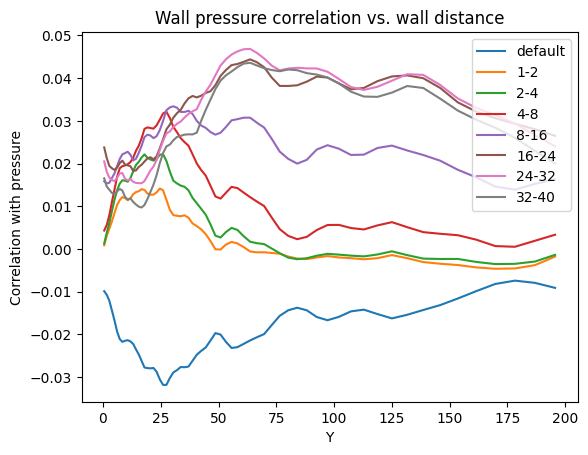

In [17]:
sigmas = [1, 2, 4, 8, 16, 24, 32, 40]
plot_comp(0, sigmas, "pressure")

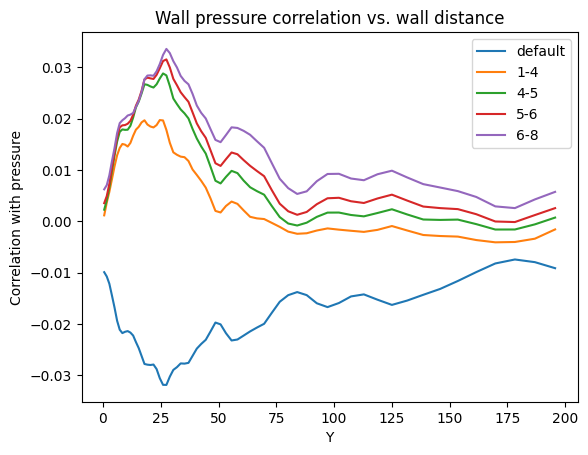

In [18]:
sigmas = [1, 4, 5, 6, 8]
plot_comp(0, sigmas, "pressure")

In [11]:
pressure = xs[:, 0, ...]
velocity_norm = .5 * np.sum(ys**2, axis=(1))

In [12]:

corre = get_correlation(pressure, velocity_norm, sigmas)

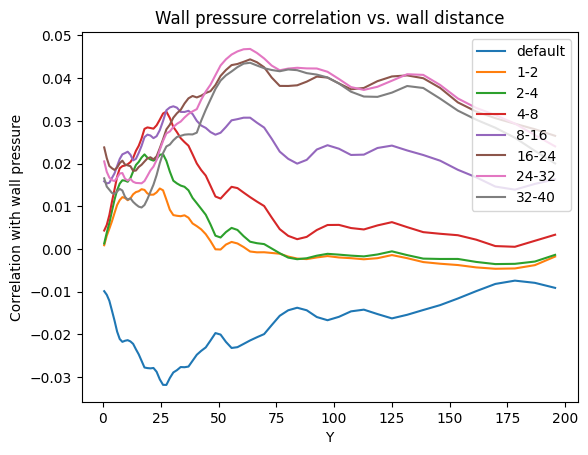

In [13]:
import matplotlib.pyplot as plt
names = ["default", "1-2", "2-4", "4-8", "8-16", "16-24", "24-32", "32-40"]
for corr, name in zip(corre, names):
    plt.plot(dataset.channel.get_simulation_channel().y_dimension[:64] * 200, corr, label=name)
plt.xlabel('Y')
plt.ylabel('Correlation with wall pressure')
plt.title('Wall pressure correlation vs. wall distance')
plt.legend()
plt.show()

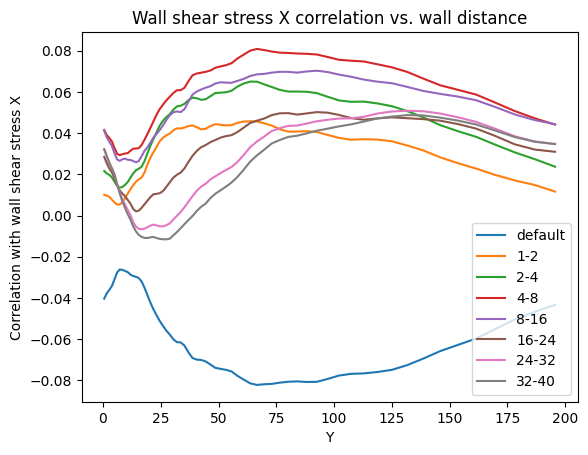

In [6]:
shear_stress_x = xs[:, 1, ...]
corre = get_correlation(shear_stress_x, velocity_norm)

import matplotlib.pyplot as plt
names = ["default", "1-2", "2-4", "4-8", "8-16", "16-24", "24-32", "32-40"]
for corr, name in zip(corre, names):
    plt.plot(dataset.channel.get_simulation_channel().y_dimension[:64] * 200, corr, label=name)
plt.xlabel('Y')
plt.ylabel('Correlation with wall shear stress X')
plt.title('Wall shear stress X correlation vs. wall distance')
plt.legend()
plt.show()

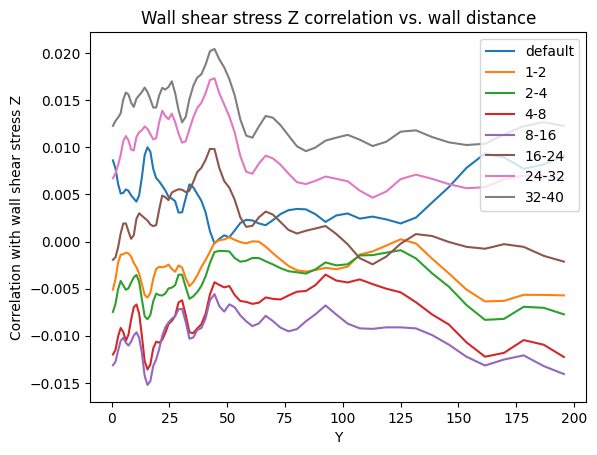

In [7]:
shear_stress_z = xs[:, 2, ...]
corre = get_correlation(shear_stress_z, velocity_norm)

import matplotlib.pyplot as plt
names = ["default", "1-2", "2-4", "4-8", "8-16", "16-24", "24-32", "32-40"]
for corr, name in zip(corre, names):
    plt.plot(dataset.channel.get_simulation_channel().y_dimension[:64] * 200, corr, label=name)
plt.xlabel('Y')
plt.ylabel('Correlation with wall shear stress Z')
plt.title('Wall shear stress Z correlation vs. wall distance')
plt.legend()
plt.show()